<a href="https://colab.research.google.com/github/Arun1374/Hotel-booking-analysis-Project/blob/main/Copy_of_Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
content='/content/drive/MyDrive/Copy of Hotel Bookings.csv'
df=pd.read_csv(content)

In [ ]:
#rows and column present are as below in the given DataType-
df.shape

(119390, 32)

In [ ]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [ ]:
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
df.describe()


,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [ ]:
# we will create df_copy folder to copy the actual data frame without touching the actual data incase of need for actual dataframe.
df_copy=df.copy()

In [ ]:
# Droping Duplicate Values we get , first check Duplicate then clear all the Duplicate values in it.
df_copy[df_copy.duplicated()].count()

hotel                             31994
is_canceled                       31994
lead_time                         31994
arrival_date_year                 31994
arrival_date_month                31994
arrival_date_week_number          31994
arrival_date_day_of_month         31994
stays_in_weekend_nights           31994
stays_in_week_nights              31994
adults                            31994
children                          31994
babies                            31994
meal                              31994
country                           31958
market_segment                    31994
distribution_channel              31994
is_repeated_guest                 31994
previous_cancellations            31994
previous_bookings_not_canceled    31994
reserved_room_type                31994
assigned_room_type                31994
booking_changes                   31994
deposit_type                      31994
agent                             27847
company                            1538


In [ ]:
df_copy[df_copy.duplicated()].shape

(31994, 32)

In [ ]:
# Delete Duplicate value
df_copy.drop_duplicates(inplace=True)

In [ ]:
# we will create df_copy folder to copy the actual data frame without touching the actual data incase of need for actual dataframe.
df_copy.shape

(87396, 32)

In [ ]:
# Analysing the above dataframe info & Description it is clear that only 'children','country','agent','company' have nullvalues in it.
df_copy[['children','country','agent','company']].isnull()

,children,country,agent,company
0,False,False,True,True
1,False,False,True,True
2,False,False,True,True
3,False,False,False,True
4,False,False,False,True
...,...,...,...,...
119385,False,False,False,True
119386,False,False,False,True
119387,False,False,False,True
119388,False,False,False,True


In [ ]:
# check the null values in columns , so it wont cause any problem later for fetching and calculation in dataframe.
df_copy[['children','country','agent','company']].isnull().sum()

children        4
country       452
agent       12193
company     82137
dtype: int64

In [ ]:
#For children
df_copy['children'].fillna(df_copy['children'].mean(),inplace=True)

In [ ]:
#For country
df_copy['country'].fillna('Other',inplace=True)

In [ ]:
#For agent
df_copy['agent'].fillna(0,inplace=True)


In [ ]:
#For company
df_copy['company'].fillna(0,inplace=True)


Check for null values for the confirmation as below.

In [ ]:
df_copy[['children','country','agent','company']].isnull().sum()

children    0
country     0
agent       0
company     0
dtype: int64

Now lets check wether all the rows are fullfilled

In [ ]:
from operator import index
df_copy.drop(df_copy.index[df_copy['children']+df_copy['adults']+df_copy['babies']==0],inplace=True)

In [ ]:
df_copy.shape

(87230, 32)

In [ ]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87230 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87230 non-null  object 
 1   is_canceled                     87230 non-null  int64  
 2   lead_time                       87230 non-null  int64  
 3   arrival_date_year               87230 non-null  int64  
 4   arrival_date_month              87230 non-null  object 
 5   arrival_date_week_number        87230 non-null  int64  
 6   arrival_date_day_of_month       87230 non-null  int64  
 7   stays_in_weekend_nights         87230 non-null  int64  
 8   stays_in_week_nights            87230 non-null  int64  
 9   adults                          87230 non-null  int64  
 10  children                        87230 non-null  float64
 11  babies                          87230 non-null  int64  
 12  meal                           

Date change column datatype with suitable Dtype

In [ ]:
from datetime import datetime
df_copy['children'],df_copy['agent'],df_copy['reservation_status_date']=df_copy['children'].astype(int),df_copy['agent'].astype(int),df_copy['reservation_status_date'].astype(np.datetime64)

In [ ]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87230 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           87230 non-null  object        
 1   is_canceled                     87230 non-null  int64         
 2   lead_time                       87230 non-null  int64         
 3   arrival_date_year               87230 non-null  int64         
 4   arrival_date_month              87230 non-null  object        
 5   arrival_date_week_number        87230 non-null  int64         
 6   arrival_date_day_of_month       87230 non-null  int64         
 7   stays_in_weekend_nights         87230 non-null  int64         
 8   stays_in_week_nights            87230 non-null  int64         
 9   adults                          87230 non-null  int64         
 10  children                        87230 non-null  int64         
 11  b

Best time of year to book a hotel room .

In [ ]:
df_copy[['lead_time','adults','children','adr','agent','hotel']][df['children']==1]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,lead_time,adults,children,adr,agent,hotel
13,18,2,1,154.77,241,Resort Hotel
87,79,2,1,108.73,242,Resort Hotel
98,101,2,1,99.30,240,Resort Hotel
118,79,2,1,149.00,250,Resort Hotel
143,109,2,1,85.59,241,Resort Hotel
...,...,...,...,...,...,...
119162,171,2,1,180.00,14,City Hotel
119228,341,2,1,96.91,22,City Hotel
119270,0,2,1,135.00,9,City Hotel
119287,167,2,1,177.75,9,City Hotel


In [ ]:
#Best time of year to book a hotel ?
df_copy['arrival_date_year'].unique()

array([2015, 2016, 2017])

In [ ]:
Highest_profitable_year=pd.DataFrame(df_copy.groupby(['arrival_date_year']).agg({'adr':'sum'}).sort_values(by='adr',ascending=False)).reset_index()
Highest_profitable_year

,arrival_date_year,adr
0,2016,4303105.84
1,2017,3761531.89
2,2015,1226930.09


Text(0.5, 1.0, 'Highest porfitable year for hotels')

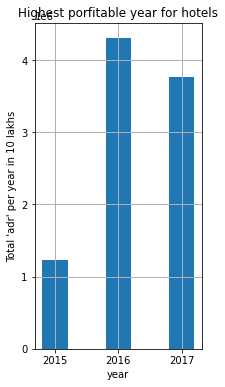

In [ ]:
plt.rcParams['figure.figsize'] = (3, 6)
A=Highest_profitable_year['arrival_date_year']
B=Highest_profitable_year['adr']
plt.bar(A,B,width=.4)
plt.grid(linestyle ='-',linewidth =1)
plt.xlabel("year")
plt.ylabel("Total 'adr' per year in 10 lakhs")
plt.title("Highest porfitable year for hotels")

In [ ]:
No_of_Bookings=df_copy.groupby('arrival_date_year').size().reset_index(name='booking_no')
No_of_Bookings

,arrival_date_year,booking_no
0,2015,13284
1,2016,42313
2,2017,31633


<BarContainer object of 3 artists>

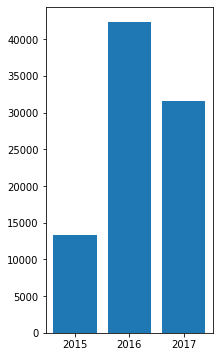

In [ ]:
plt.rcParams['figure.figsize'] = (3, 6)
plt.bar(No_of_Bookings['arrival_date_year'],No_of_Bookings['booking_no'])

In [ ]:
# No.of bookings year wise.
a=df_copy.groupby(['arrival_date_year','arrival_date_month']).size().reset_index(name='booking_no')
No_booking_15=a[['arrival_date_year','arrival_date_month','booking_no']][a['arrival_date_year']==2015]
No_booking_15
No_booking_16=a[['arrival_date_year','arrival_date_month','booking_no']][a['arrival_date_year']==2016]
No_booking_17=a[['arrival_date_year','arrival_date_month','booking_no']][a['arrival_date_year']==2017]
No_booking_17,No_booking_15,No_booking_16

(    arrival_date_year arrival_date_month  booking_no
 18               2017              April        4133
 19               2017             August        4380
 20               2017           February        3284
 21               2017            January        2836
 22               2017               July        4529
 23               2017               June        4241
 24               2017              March        3663
 25               2017                May        4567,
    arrival_date_year arrival_date_month  booking_no
 0               2015             August        2447
 1               2015           December        1975
 2               2015               July        1672
 3               2015           November        1662
 4               2015            October        2694
 5               2015          September        2834,
     arrival_date_year arrival_date_month  booking_no
 6                2016              April        3767
 7                2016           

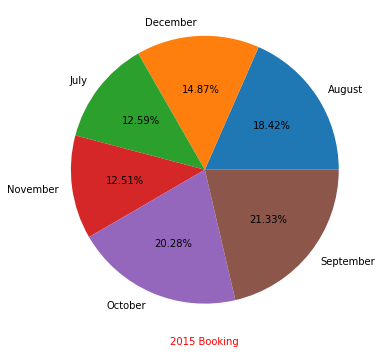

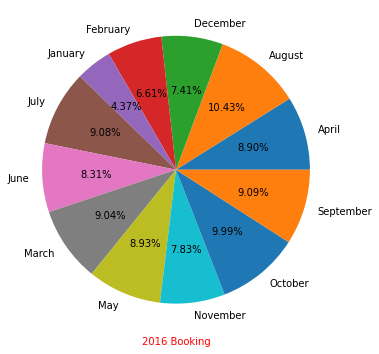

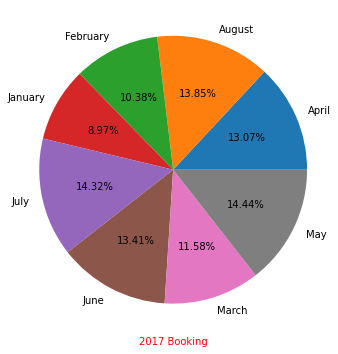

In [ ]:

plt.axis('equal')
label=No_booking_15['arrival_date_month']
size=(No_booking_15['booking_no']/No_booking_15['booking_no'].sum())*100
plt.pie(size,labels=label,radius=2,autopct='%0.2f%%')
plt.xlabel('2015 Booking',c='r')
plt.show()


plt.axis('equal')
label=No_booking_16['arrival_date_month']
size=(No_booking_16['booking_no']/No_booking_15['booking_no'].sum())*100
plt.pie(size,labels=label,radius=2,autopct='%0.2f%%')
plt.xlabel('2016 Booking',c='r')
plt.show()

plt.axis('equal')
label=No_booking_17['arrival_date_month']
size=(No_booking_17['booking_no']/No_booking_15['booking_no'].sum())*100
plt.pie(size,labels=label,radius=2,autopct='%0.2f%%')
plt.xlabel('2017 Booking',c='r')
plt.show()

For the Above pie chart it is confirmed that 

<function matplotlib.pyplot.show(*args, **kw)>

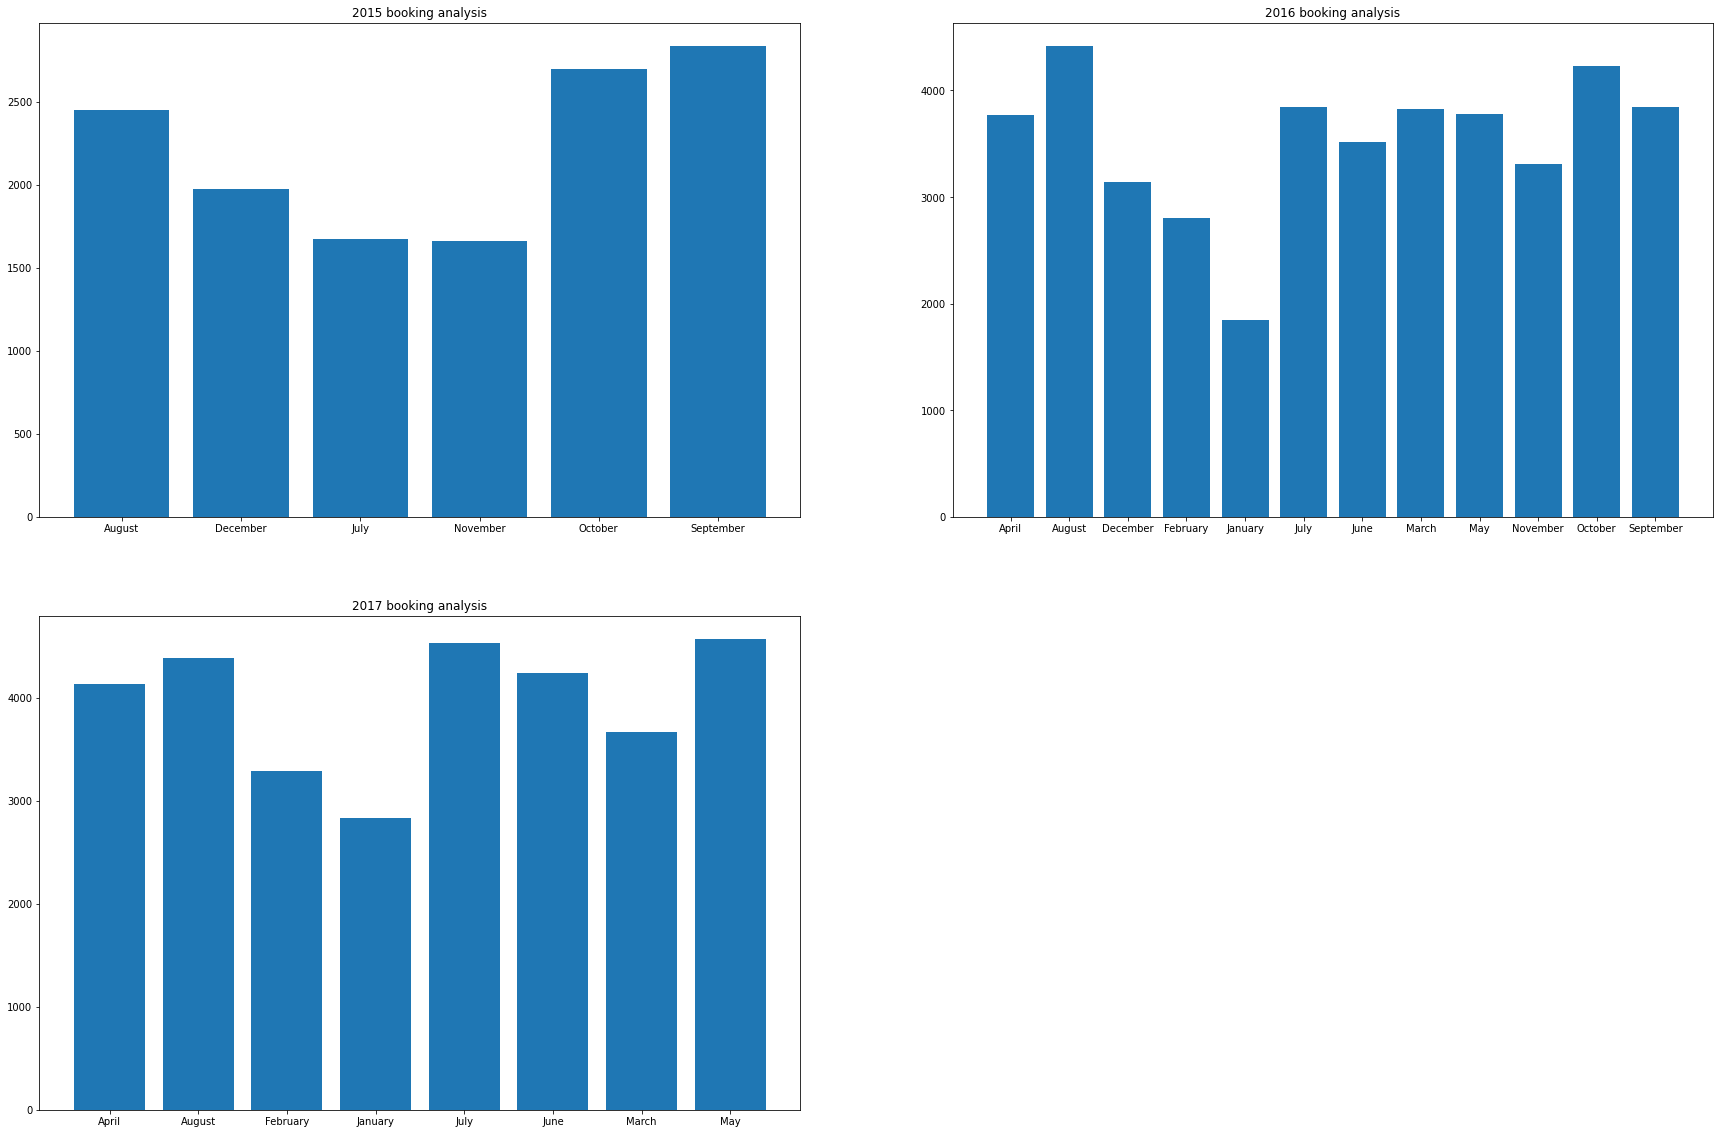

In [ ]:
plt.rcParams['figure.figsize'] = (30,20)
plt.subplot(2,2,1)
plt.bar(No_booking_15['arrival_date_month'],No_booking_15['booking_no'])
plt.title('2015 booking analysis')

plt.subplot(2,2,2)
plt.bar(No_booking_16['arrival_date_month'],No_booking_16['booking_no'])
plt.title('2016 booking analysis')

plt.subplot(2,2,3)
plt.bar(No_booking_17['arrival_date_month'],No_booking_17['booking_no'])
plt.title('2017 booking analysis')
plt.show

Below we can find that for 43441 hotels speacial request were made.

In [ ]:
hotel_tooked_request=df_copy[['hotel','total_of_special_requests']][df_copy['total_of_special_requests']>0]
hotel_tooked_request.groupby('hotel').size().reset_index(name='booking_no')

,hotel,booking_no
0,City Hotel,27008
1,Resort Hotel,16433


Below we can find the max special request made on hotels.

In [ ]:
hotel_tooked_max_request=df_copy['hotel'][df_copy['total_of_special_requests']==df_copy['total_of_special_requests'].max()]
hotel_tooked_max_request.count()

36

In [ ]:
df_copy['total_of_special_requests'].max()

5

In [ ]:
Hotel_tooked_request=df_copy[['hotel','total_of_special_requests']][df_copy['total_of_special_requests']>0]

Hotel_request_for_CityHotel=Hotel_tooked_request[Hotel_tooked_request['hotel']=='City Hotel'].groupby('total_of_special_requests').size().reset_index(name='request_no')
Hotel_request_for_ResortHotel=Hotel_tooked_request[Hotel_tooked_request['hotel']=='Resort Hotel'].groupby('total_of_special_requests').size().reset_index(name='request_no')

Text(0, 0.5, 'TOTAL COUNT OF REQUEST MADE IN RESORT HOTEL')

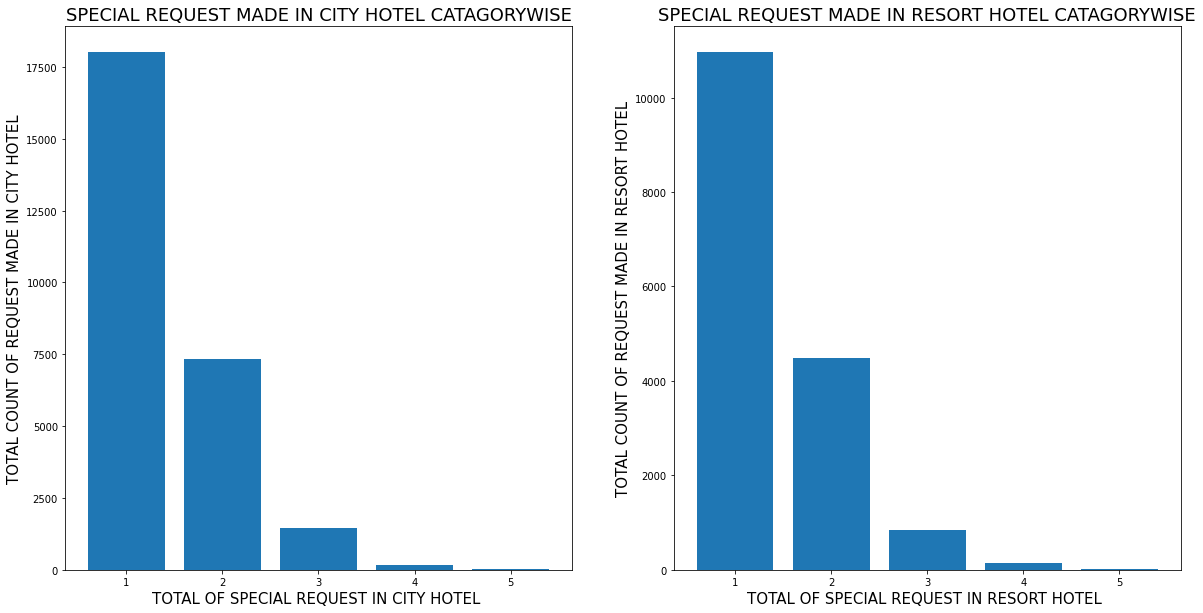

In [ ]:
import matplotlib.pyplot as plt
from importlib import reload
plt=reload(plt)
plt.rcParams['figure.figsize'] = (20,10)
plt.subplot(1,2,1)
plt.bar(Hotel_request_for_CityHotel['total_of_special_requests'],Hotel_request_for_CityHotel['request_no'])
plt.title('SPECIAL REQUEST MADE IN CITY HOTEL CATAGORYWISE',FontSize=18)
plt.xlabel('TOTAL OF SPECIAL REQUEST IN CITY HOTEL ',FontSize=15)
plt.ylabel('TOTAL COUNT OF REQUEST MADE IN CITY HOTEL',FontSize=15)
plt.subplot(1,2,2)
plt.bar(Hotel_request_for_ResortHotel['total_of_special_requests'],Hotel_request_for_ResortHotel['request_no'])
plt.title('SPECIAL REQUEST MADE IN RESORT HOTEL CATAGORYWISE',FontSize=18)
plt.xlabel('TOTAL OF SPECIAL REQUEST IN RESORT HOTEL ',FontSize=15)
plt.ylabel('TOTAL COUNT OF REQUEST MADE IN RESORT HOTEL',FontSize=15)

** For the above graph it is clear that City Hotel was likely to receive more special request compared to Resort Hotel.**

In [ ]:
df_copy

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0,0.0,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0,0.0,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0,0.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304,0.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240,0.0,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394,0.0,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9,0.0,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9,0.0,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89,0.0,0,Transient,104.40,0,0,Check-Out,2017-09-07


# **Adr On basis of Optimal length of the stay.**

# Considering Total people as 2 persons

In [ ]:
df_copy['Total_People']=df_copy['adults']+df_copy['children']+df_copy['babies']
df_copy['Total_stay_of_days']=df_copy['stays_in_week_nights']+df_copy['stays_in_weekend_nights']
Average_2people_stay=df_copy[['Total_People','adr','Total_stay_of_days']][df_copy['Total_People']==2][df_copy['adr']<5000]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


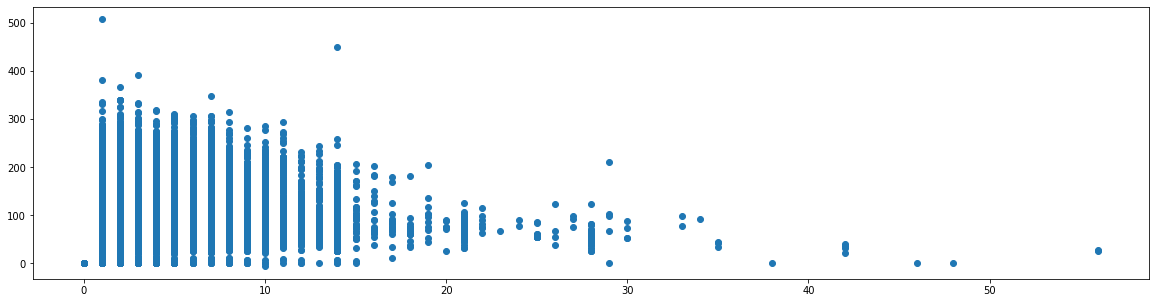

In [ ]:
import matplotlib.pyplot as plt
plt=reload(plt)
plt.rcParams['figure.figsize'] = (20,5)
plt.scatter(Average_2people_stay['Total_stay_of_days'],Average_2people_stay['adr'])
plt.show()

# Considering Total people as 1 person stay

In [ ]:
df_copy['Total_People']=df_copy['adults']+df_copy['children']+df_copy['babies']
df_copy['Total_stay_of_days']=df_copy['stays_in_week_nights']+df_copy['stays_in_weekend_nights']
Average_1people_stay=df_copy[['Total_People','adr','Total_stay_of_days']][df_copy['Total_People']==1][df_copy['adr']<5000]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


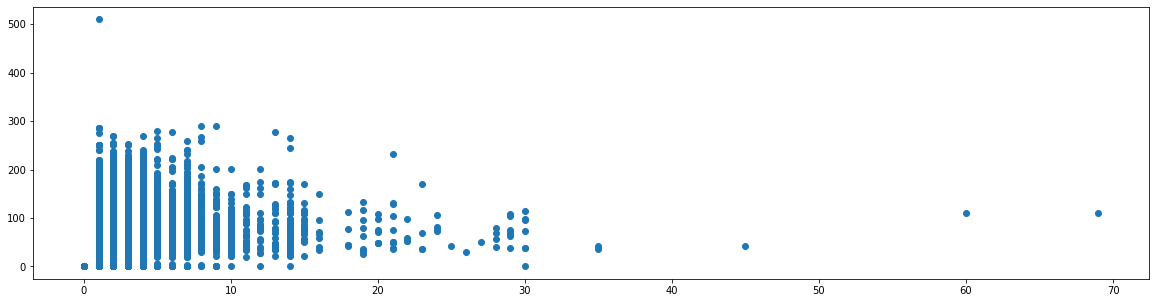

In [ ]:
import matplotlib.pyplot as plt
plt=reload(plt)
plt.rcParams['figure.figsize'] = (20,5)
plt.scatter(Average_1people_stay['Total_stay_of_days'],Average_1people_stay['adr'])
plt.show()

# Considering Total people as 3 person stay

In [ ]:
df_copy['Total_People']=df_copy['adults']+df_copy['children']+df_copy['babies']
df_copy['Total_stay_of_days']=df_copy['stays_in_week_nights']+df_copy['stays_in_weekend_nights']
Average_3people_stay=df_copy[['Total_People','adr','Total_stay_of_days']][df_copy['Total_People']==3][df_copy['adr']<5000]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


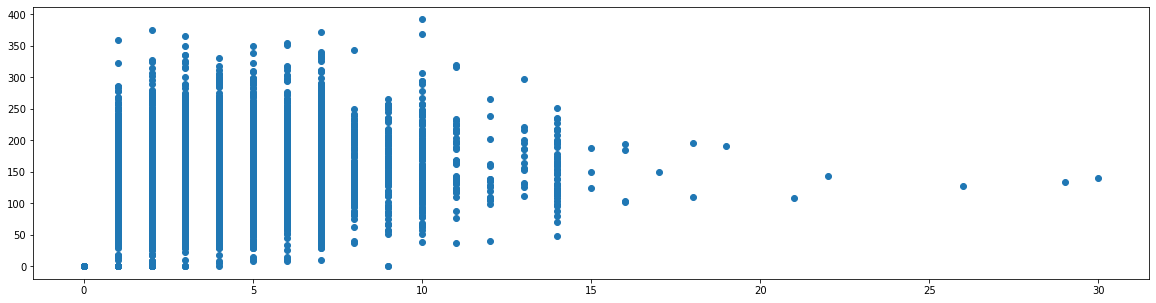

In [ ]:
import matplotlib.pyplot as plt
plt=reload(plt)
plt.rcParams['figure.figsize'] = (20,5)
plt.scatter(Average_3people_stay['Total_stay_of_days'],Average_3people_stay['adr'])
plt.show()

# From the above charts it is clear that , If the no. of days increase ADR will get decrease.

# **Conclusion**

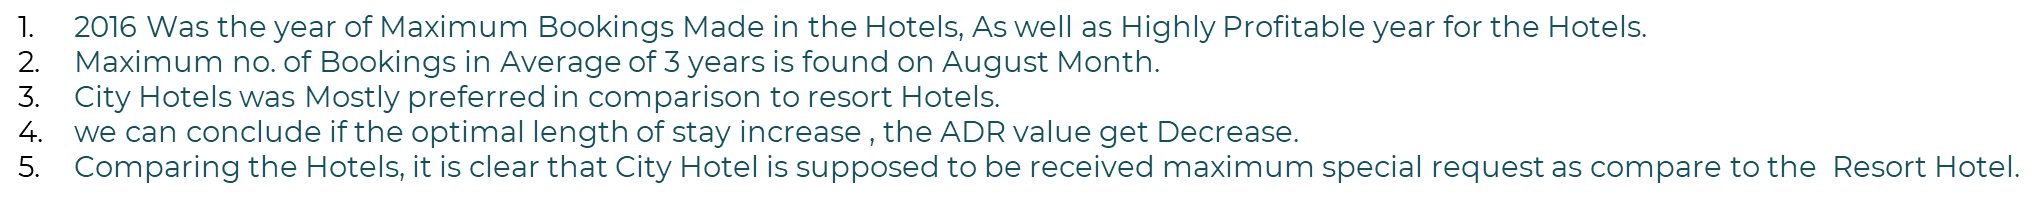